In [9]:
import matplotlib.pyplot as plt

import tensorflow
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.utils import array_to_img, img_to_array, load_img

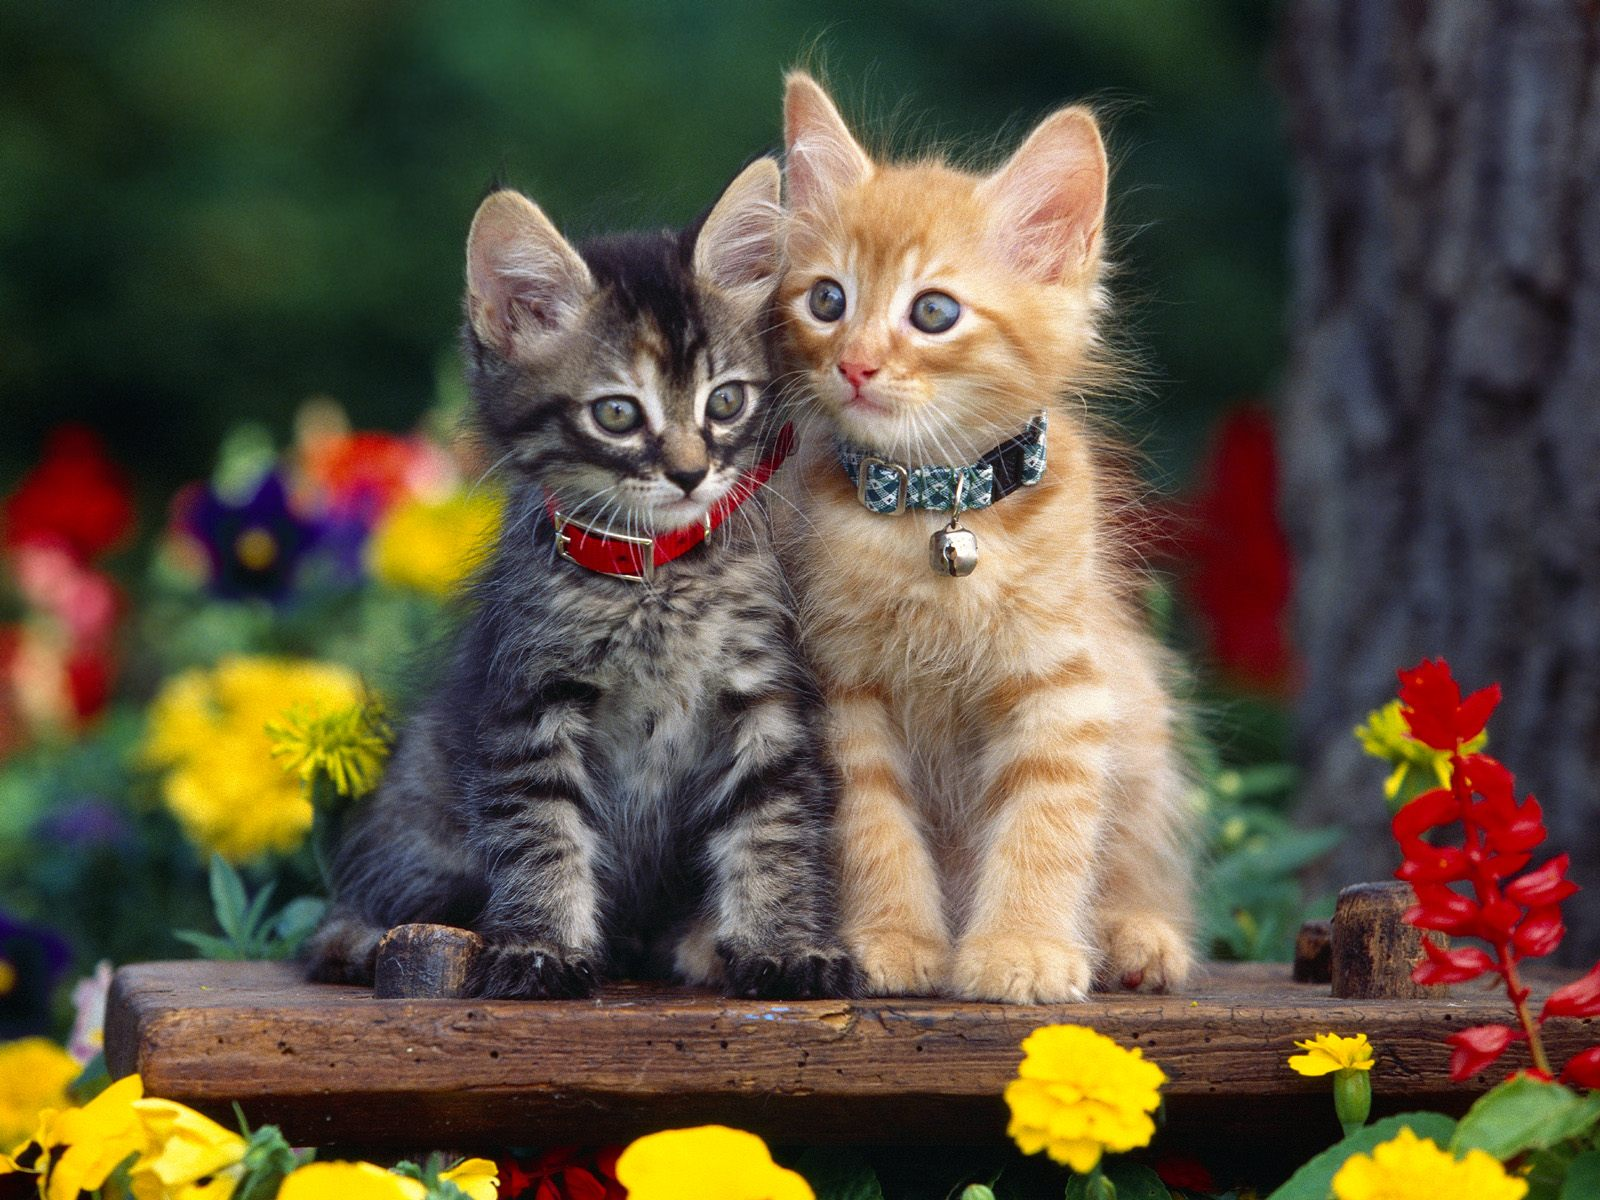

In [7]:
cat_img=load_img('/content/R.jpeg')
cat_img

In [8]:
cat_img_array=img_to_array(cat_img)
cat_img_array

array([[[28., 49., 30.],
        [22., 43., 24.],
        [20., 41., 22.],
        ...,
        [37., 23., 22.],
        [41., 29., 29.],
        [39., 27., 27.]],

       [[27., 48., 29.],
        [22., 43., 24.],
        [19., 40., 21.],
        ...,
        [34., 20., 19.],
        [37., 23., 23.],
        [31., 19., 19.]],

       [[23., 44., 25.],
        [20., 41., 22.],
        [19., 40., 21.],
        ...,
        [38., 24., 23.],
        [40., 26., 26.],
        [36., 22., 22.]],

       ...,

       [[23.,  7.,  7.],
        [18.,  2.,  2.],
        [18.,  2.,  2.],
        ...,
        [41., 82., 40.],
        [39., 77., 38.],
        [44., 82., 43.]],

       [[24.,  8.,  8.],
        [18.,  2.,  2.],
        [17.,  1.,  1.],
        ...,
        [46., 87., 43.],
        [39., 80., 38.],
        [44., 85., 43.]],

       [[22.,  6.,  6.],
        [15.,  0.,  0.],
        [15.,  0.,  0.],
        ...,
        [46., 87., 43.],
        [37., 78., 36.],
        [43., 84., 42.]]

In [24]:
def plot_image(original_image,updated_image):
  fig, ax=plt.subplots(1,2,figsize=(10,5))
  ax[0].imshow(original_image)
  ax[0].set_title('Original_Image')

  ax[1].imshow(updated_image)
  ax[1].set_title('Updated_Image')

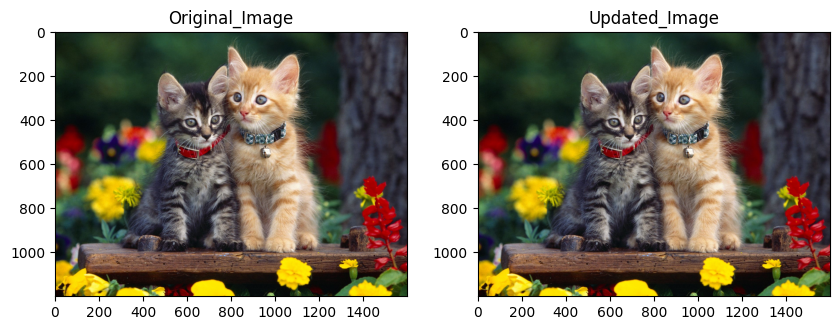

In [25]:
updated_data=ImageDataGenerator(horizontal_flip=True)
updated_array=updated_data.random_transform(cat_img_array)
updated_cat_image=array_to_img(updated_array)
plot_image(cat_img, updated_cat_image)

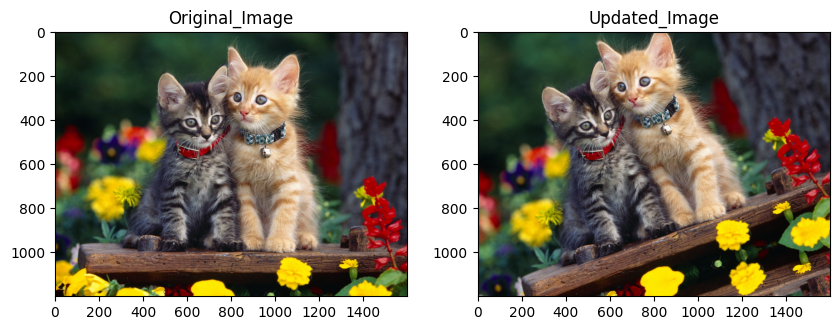

In [33]:
updated_data=ImageDataGenerator(rotation_range=30,fill_mode='reflect')
updated_array=updated_data.random_transform(cat_img_array)
updated_cat_image=array_to_img(updated_array)
plot_image(cat_img, updated_cat_image)

In [34]:
print(cat_img_array)
print('******')
print(updated_array)

[[[28. 49. 30.]
  [22. 43. 24.]
  [20. 41. 22.]
  ...
  [37. 23. 22.]
  [41. 29. 29.]
  [39. 27. 27.]]

 [[27. 48. 29.]
  [22. 43. 24.]
  [19. 40. 21.]
  ...
  [34. 20. 19.]
  [37. 23. 23.]
  [31. 19. 19.]]

 [[23. 44. 25.]
  [20. 41. 22.]
  [19. 40. 21.]
  ...
  [38. 24. 23.]
  [40. 26. 26.]
  [36. 22. 22.]]

 ...

 [[23.  7.  7.]
  [18.  2.  2.]
  [18.  2.  2.]
  ...
  [41. 82. 40.]
  [39. 77. 38.]
  [44. 82. 43.]]

 [[24.  8.  8.]
  [18.  2.  2.]
  [17.  1.  1.]
  ...
  [46. 87. 43.]
  [39. 80. 38.]
  [44. 85. 43.]]

 [[22.  6.  6.]
  [15.  0.  0.]
  [15.  0.  0.]
  ...
  [46. 87. 43.]
  [37. 78. 36.]
  [43. 84. 42.]]]
******
[[[ 36.100616  64.10062   40.400726]
  [ 36.033897  64.0339    41.033897]
  [ 36.828175  63.210457  40.7497  ]
  ...
  [ 39.380817  38.380817  45.82967 ]
  [ 35.89744   34.89744   42.89744 ]
  [ 35.44132   34.44132   42.44132 ]]

 [[ 34.347904  62.347904  37.99152 ]
  [ 34.424606  62.424606  39.424606]
  [ 34.517033  61.884056  39.095047]
  ...
  [ 39.43926   3

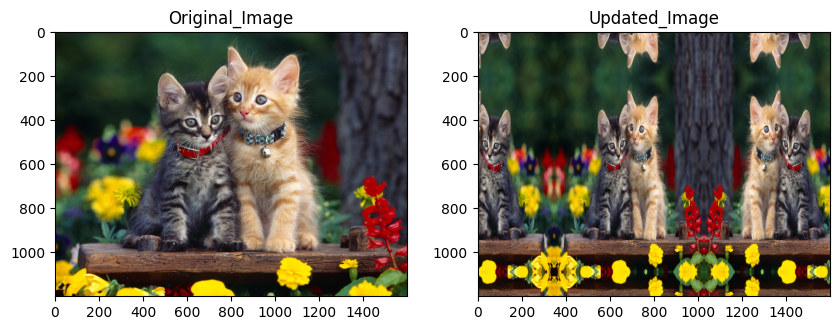

In [68]:
updated_data=ImageDataGenerator(zoom_range=[0.5,3], fill_mode='reflect')
updated_array=updated_data.random_transform(cat_img_array)
updated_cat_image=array_to_img(updated_array)
plot_image(cat_img, updated_cat_image)

In [69]:
dataset=ImageDataGenerator(
    rotation_range=45,
    width_shift_range=0.2,
    height_shift_range=0.3,
    shear_range=0.5,
    zoom_range=0.2,
    fill_mode='reflect',
    horizontal_flip=True,
    rescale=1./255,
)

In [71]:
cat_image_array_reshape=cat_img_array.reshape((1,)+cat_img_array.shape)
cat_image_array_reshape.shape

(1, 1200, 1600, 3)

In [72]:
directory='/content/sample_data'
i=0

for j in dataset.flow(cat_image_array_reshape, save_to_dir=directory, save_prefix='cat_img', save_format='.jpg'):
  i+=1
  if i>10:
    break